<a href="https://colab.research.google.com/github/Abhay182005dat/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Churn Prediction**

A Machine Learning Model That Can Predict Customers Who Will Leave The Company.

> The aim is to predict whether a bank's customers leave the bank or not. If the Client has closed his/her bank account, he/she has left.


### Dataset
`RowNumber`: corresponds to the record (row) number and has no effect on the output.

`CustomerId`: contains random values and has no effect on customer leaving the bank.
Surname: the surname of a customer has no impact on their decision to leave the bank.

`CreditScore`: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
Geography: a customer’s location can affect their decision to leave the bank.

`Gender`: it’s interesting to explore whether gender plays a role in a customer leaving the bank.

`Age`: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

`Tenure`: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

`Balance`: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

`NumOfProducts`: refers to the number of products that a customer has purchased through the bank.

`HasCrCard`: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

`IsActiveMember`: active customers are less likely to leave the bank.

`EstimatedSalary`: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

`Exited`: whether or not the customer left the bank. (0=No,1=Yes)

In [60]:
!pip install catboost lightgbm xgboost

In [61]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [62]:
df = pd.read_csv('churn.csv',index_col=0)

## EDA

In [63]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.shape

(10000, 13)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [66]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [67]:
# categorical columns
# Categorical data = data that represents labels / groups / categories instead of numbers with mathematical meaning.

# Examples:
# Gender: Male, Female, Other
# Country: India, USA, Japan
# Payment Method: Cash, Card, UPI
# Rating: Low, Medium, High

categorical_variables = [col for col in df.columns if df[col].dtype  == "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Surname',
 'Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [68]:
categorical_variables.remove("Surname")

In [69]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

#### Exited (Dependent Variable)

In [70]:
# Frequency of classes of dependent variable
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [71]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

In [72]:
# Customers who didnot leave the bank
not_churn = df.loc[df['Exited'] == 0]

### Categorical Variables

**Tenure**

In [73]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()

,count
Tenure,
0,318
10,389
9,771
6,771
4,786
3,796
5,803
1,803
8,828


In [74]:
# Frequency of Churn group according to Tenure
churn['Tenure'].value_counts().sort_values()

,count
Tenure,
0,95
10,101
7,177
6,196
8,197
2,201
4,203
5,209
3,213


**NumOfProducts**

In [75]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

,count
NumOfProducts,
3,46
1,3675
2,4242


In [76]:
# Frequency of churn group according to NumOfProducts
churn['NumOfProducts'].value_counts().sort_values()

,count
NumOfProducts,
4,60
3,220
2,348
1,1409


**HasCrCard**

In [77]:
# Examining of non churn group according to HasCrCard
not_churn["HasCrCard"].value_counts().sort_values()

,count
HasCrCard,
0,2332
1,5631


In [78]:
# Examining of churn group according to HasCrCard
churn['HasCrCard'].value_counts().sort_values()

,count
HasCrCard,
0,613
1,1424


**IsActiveMember**

In [79]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

,count
IsActiveMember,
1,4416
0,3547


In [80]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

,count
IsActiveMember,
0,1302
1,735


**Geography**

In [81]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

,count
Geography,
Germany,1695
Spain,2064
France,4204


In [82]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

,count
Geography,
Spain,413
France,810
Germany,814


**Gender**

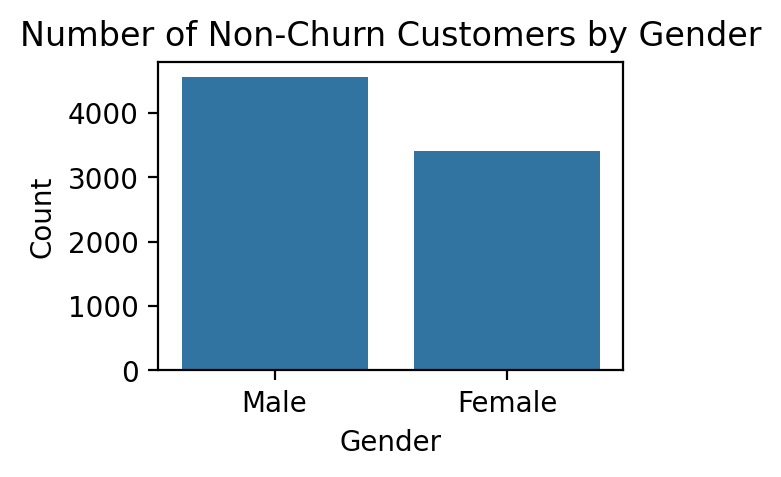

,count
Gender,
Male,4559
Female,3404


In [83]:
# Frequency of not_churn group according to Gender
non_churn_gender = not_churn.Gender.value_counts()
plt.figure(figsize=(3, 2))  # Added to control figure size
sns.barplot(x=non_churn_gender.index, y=non_churn_gender.values)
plt.title('Number of Non-Churn Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
non_churn_gender

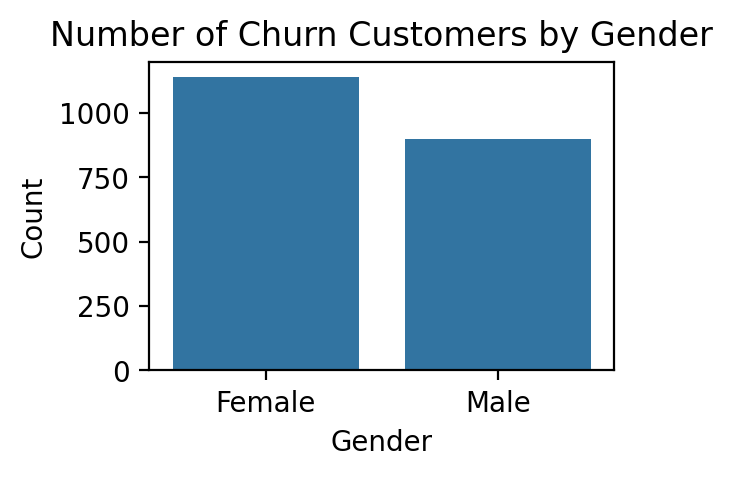

,count
Gender,
Female,1139
Male,898


In [84]:
# Frequency of churn group according to Gender
churn_gender = churn.Gender.value_counts()
plt.figure(figsize=(3, 2))
sns.barplot(x=churn_gender.index, y=churn_gender.values)
plt.title('Number of Churn Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
churn_gender


###Numerical Variables


**CreditScore**

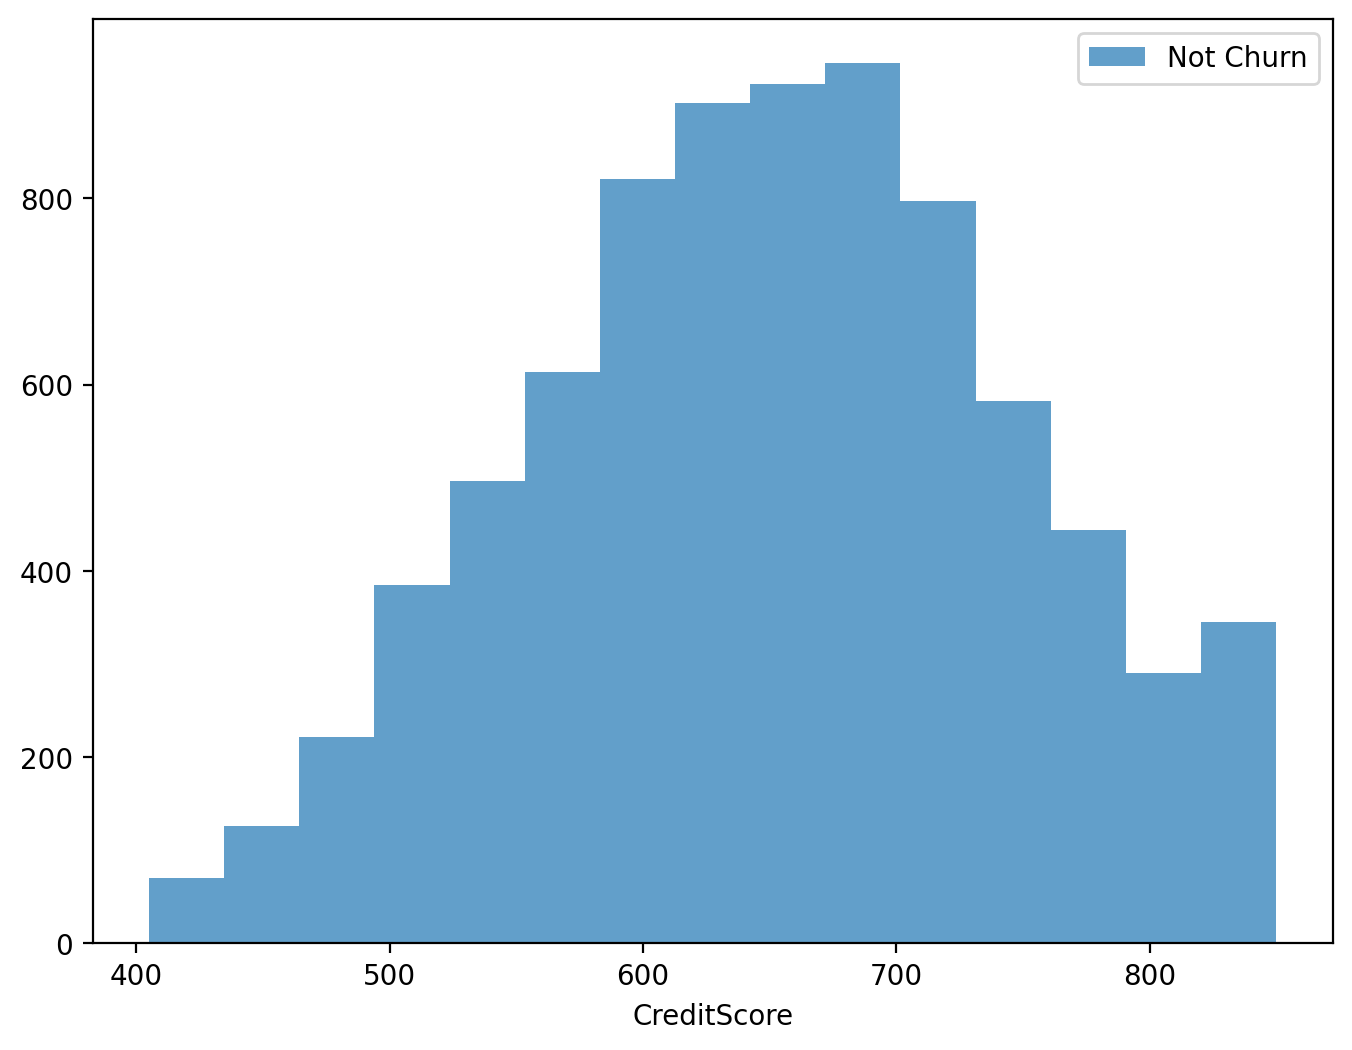

In [85]:
# distribution of the Credit Score for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(not_churn["CreditScore"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

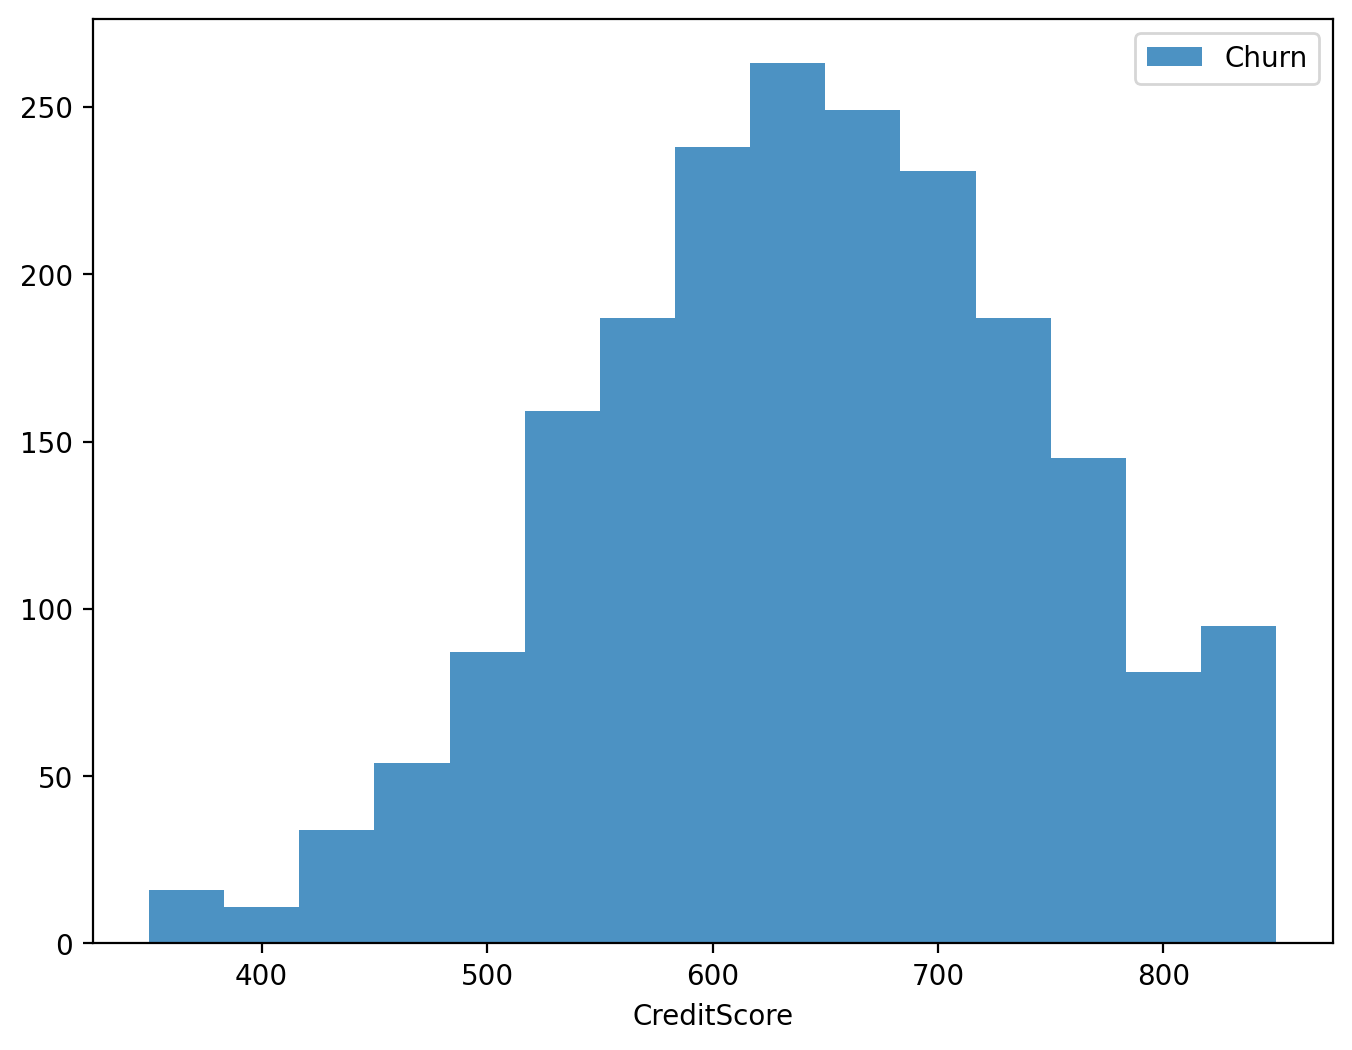

In [86]:
# distribution of the Credit Score for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(churn["CreditScore"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

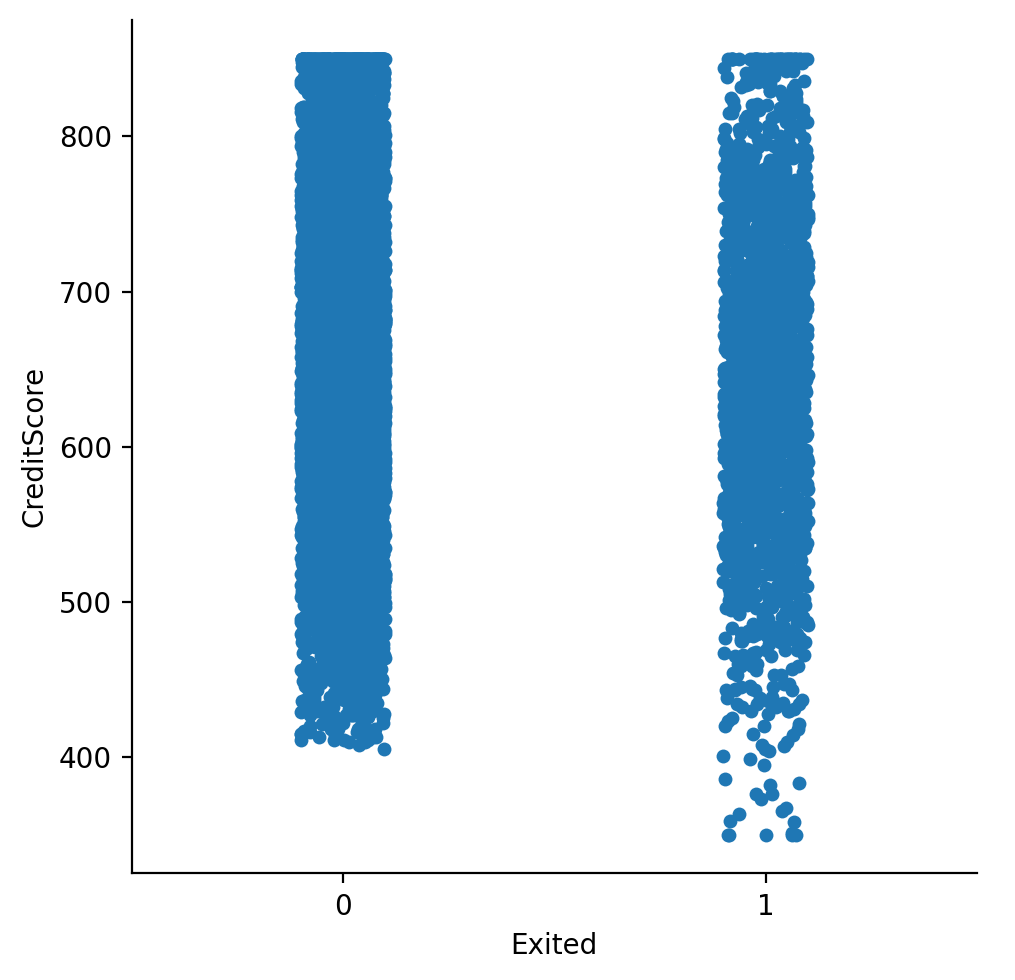

In [87]:
sns.catplot(x="Exited", y="CreditScore", data = df) # not exited(0) and exited(1)

**Age**

```
count: The number of non-churned customers, which is 7963.
mean: The average age of the non-churned customers is approximately 37.41 years.
std: The standard deviation of the age of non-churned customers is approximately 10.13. This indicates the spread or variability of the ages around the mean.
min: The minimum age among the non-churned customers is 18 years.
25%: The first quartile (25th percentile) of the age is 31 years. This means 25% of the non-churned customers are 31 years old or younger.
50%: The median (50th percentile) of the age is 36 years. This means half of the non-churned customers are 36 years old or younger, and half are older.
75%: The third quartile (75th percentile) of the age is 41 years. This means 75% of the non-churned customers are 41 years old or younger.
max: The maximum age among the non-churned customers is 92 years.
```

In [88]:
not_churn['Age'].describe()


,Age
count,7963.000000
mean,37.408389
std,10.125363
min,18.000000
25%,31.000000
50%,36.000000
75%,41.000000
max,92.000000


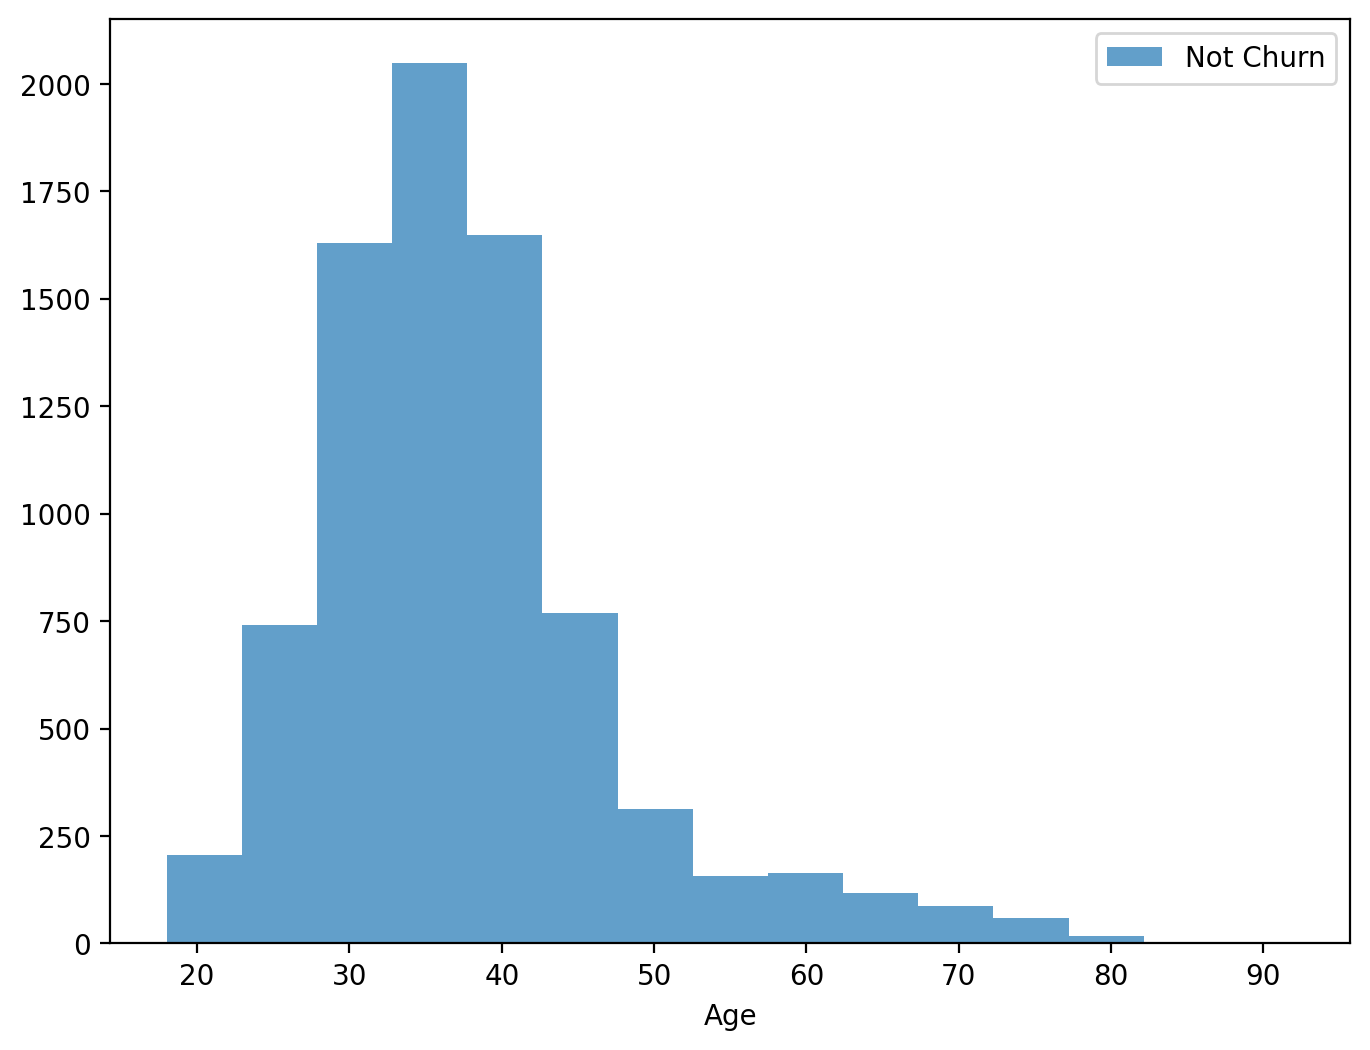

In [89]:
# Distirbution of the age for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(not_churn['Age'],bins=15, alpha = 0.7 ,label='Not Churn')
plt.legend(loc='upper right')
plt.show()

In [90]:
churn['Age'].describe()

,Age
count,2037.000000
mean,44.837997
std,9.761562
min,18.000000
25%,38.000000
50%,45.000000
75%,51.000000
max,84.000000


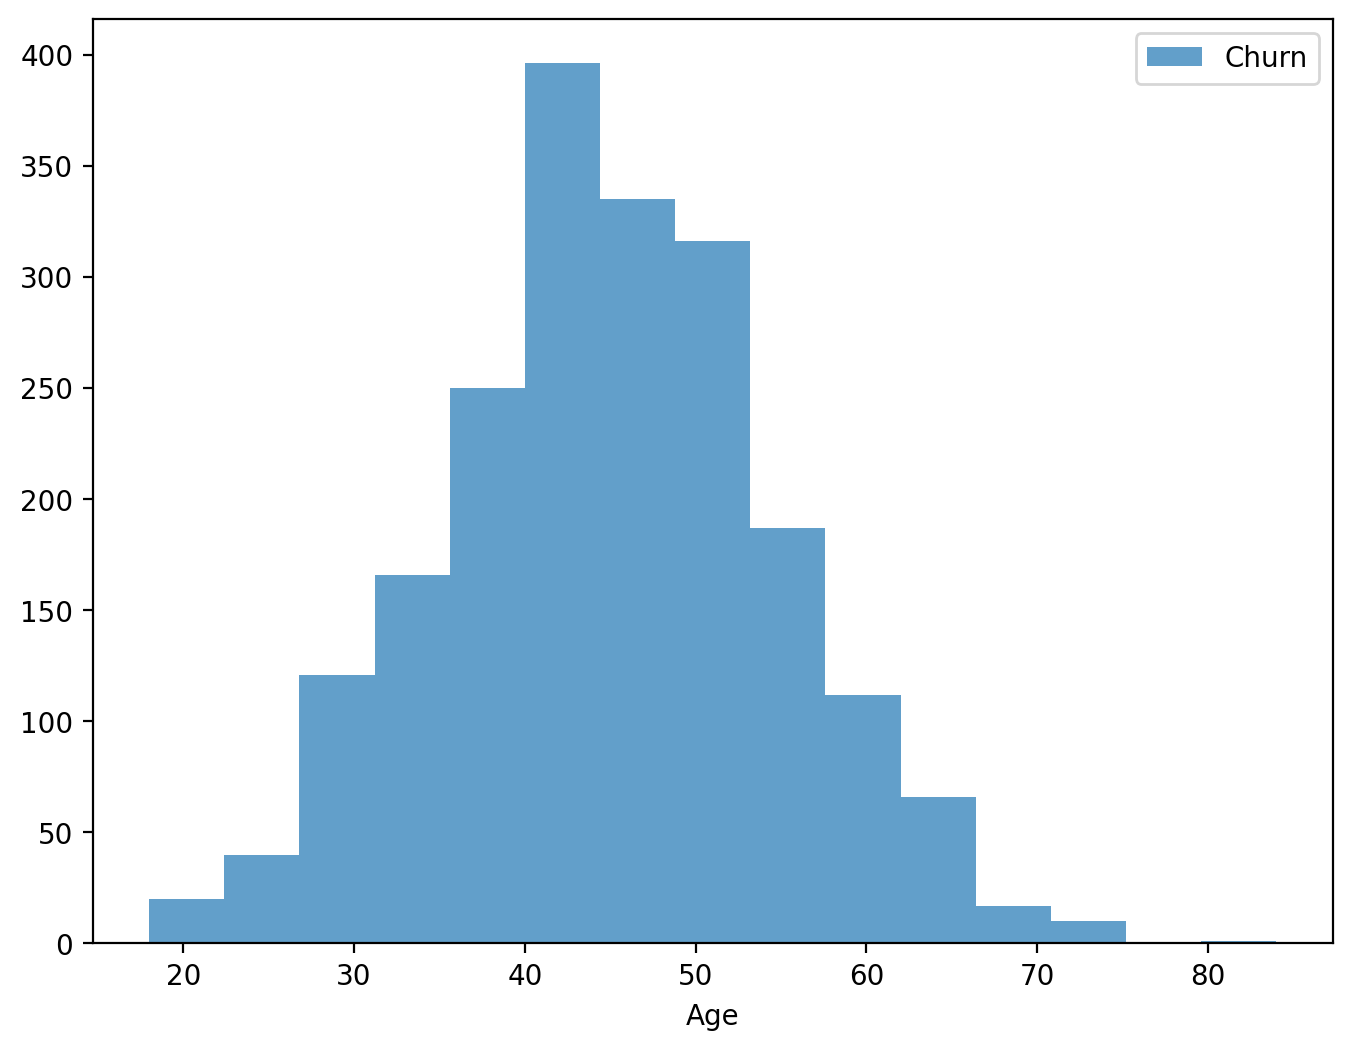

In [91]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(churn["Age"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

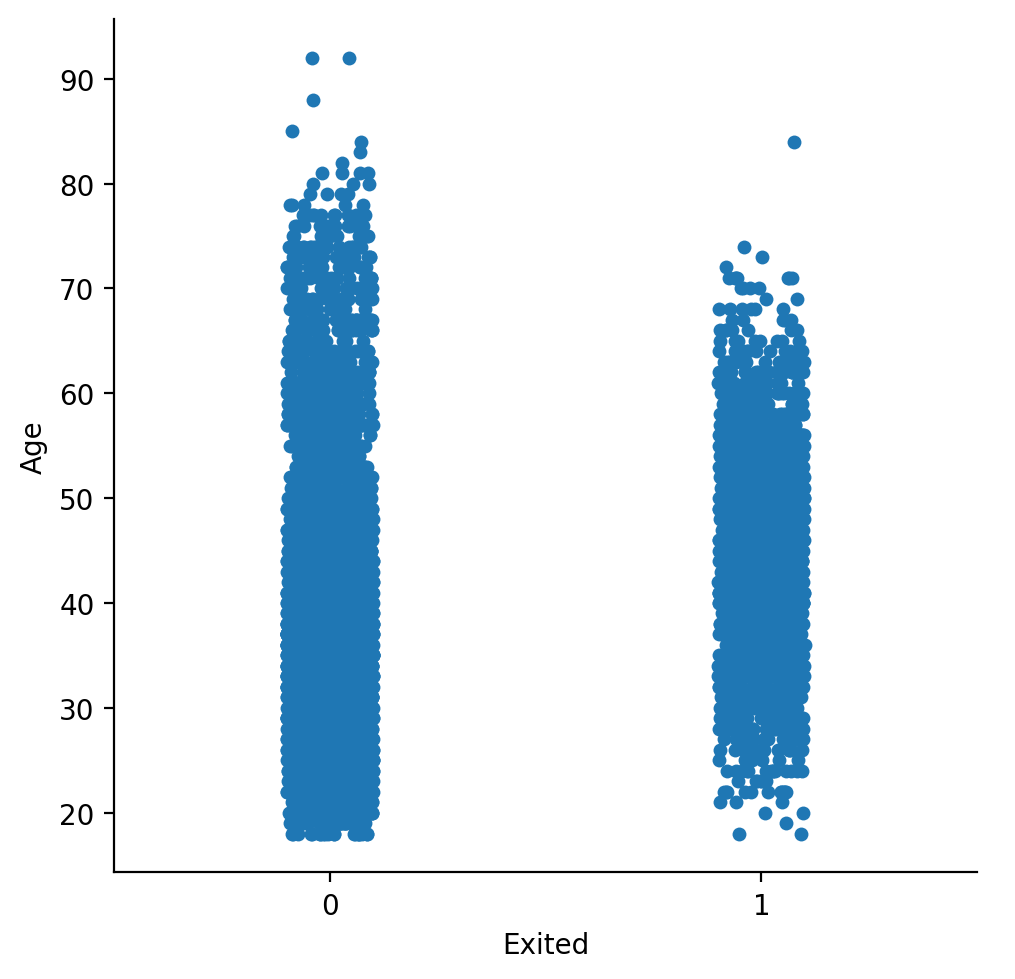

In [92]:
sns.catplot(x = "Exited",y =  "Age", data = df)

**Balance**

In [93]:
# Examining the non_churn group
not_churn["Balance"].describe()

,Balance
count,7963.000000
mean,72745.296779
std,62848.040701
min,0.000000
25%,0.000000
50%,92072.680000
75%,126410.280000
max,221532.800000


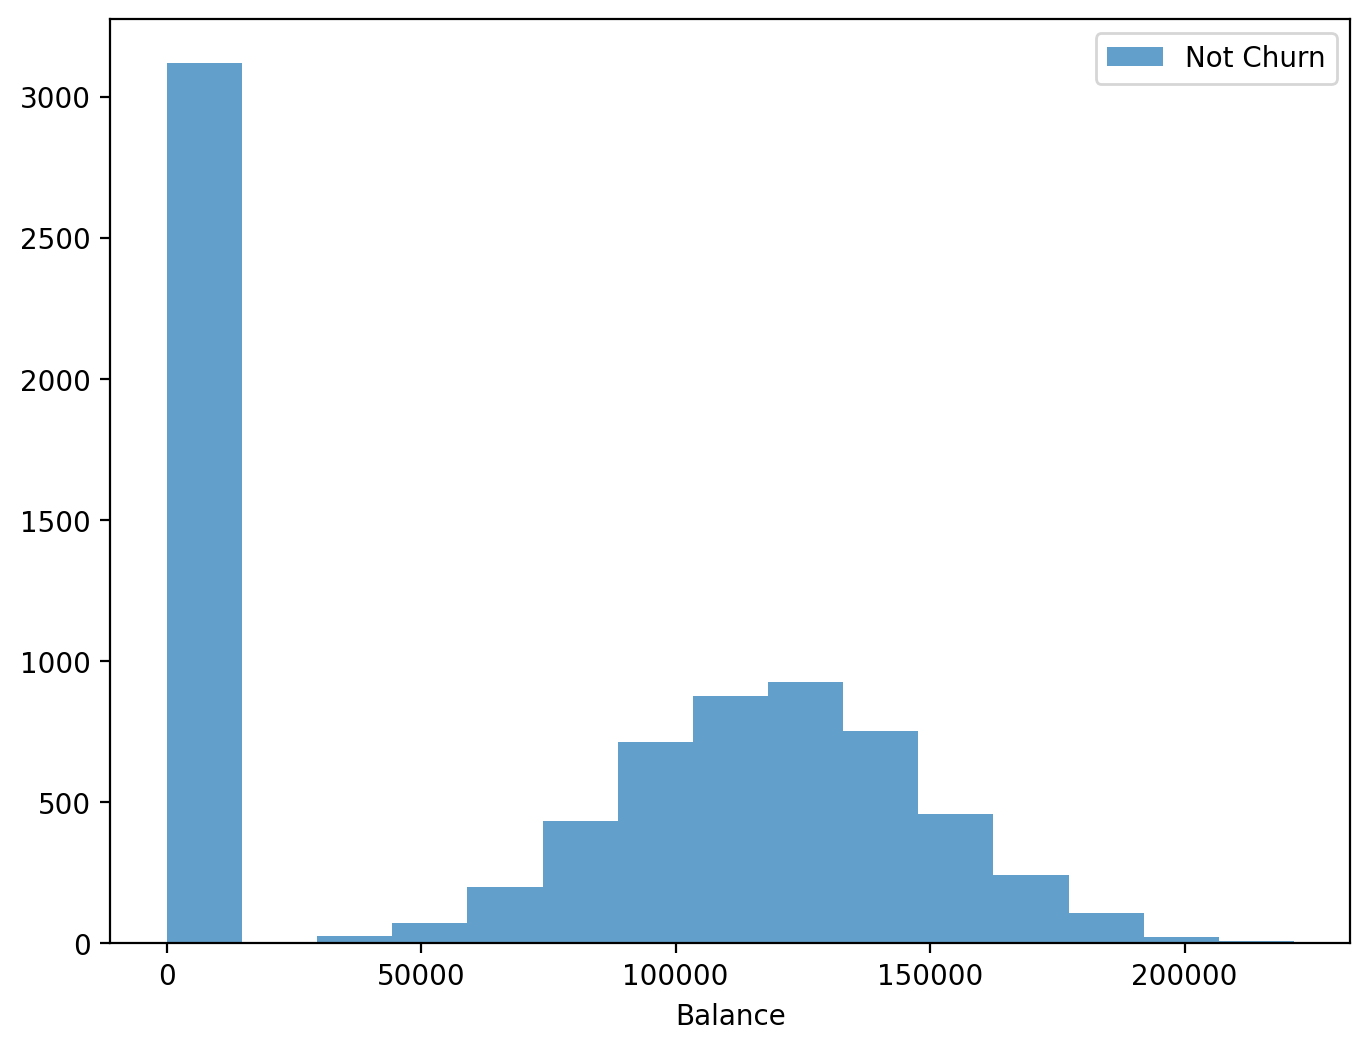

In [94]:
# distribution of the Balance for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(not_churn["Balance"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [95]:
# examining the Balance of the churn group
churn["Balance"].describe()

,Balance
count,2037.000000
mean,91108.539337
std,58360.794816
min,0.000000
25%,38340.020000
50%,109349.290000
75%,131433.330000
max,250898.090000


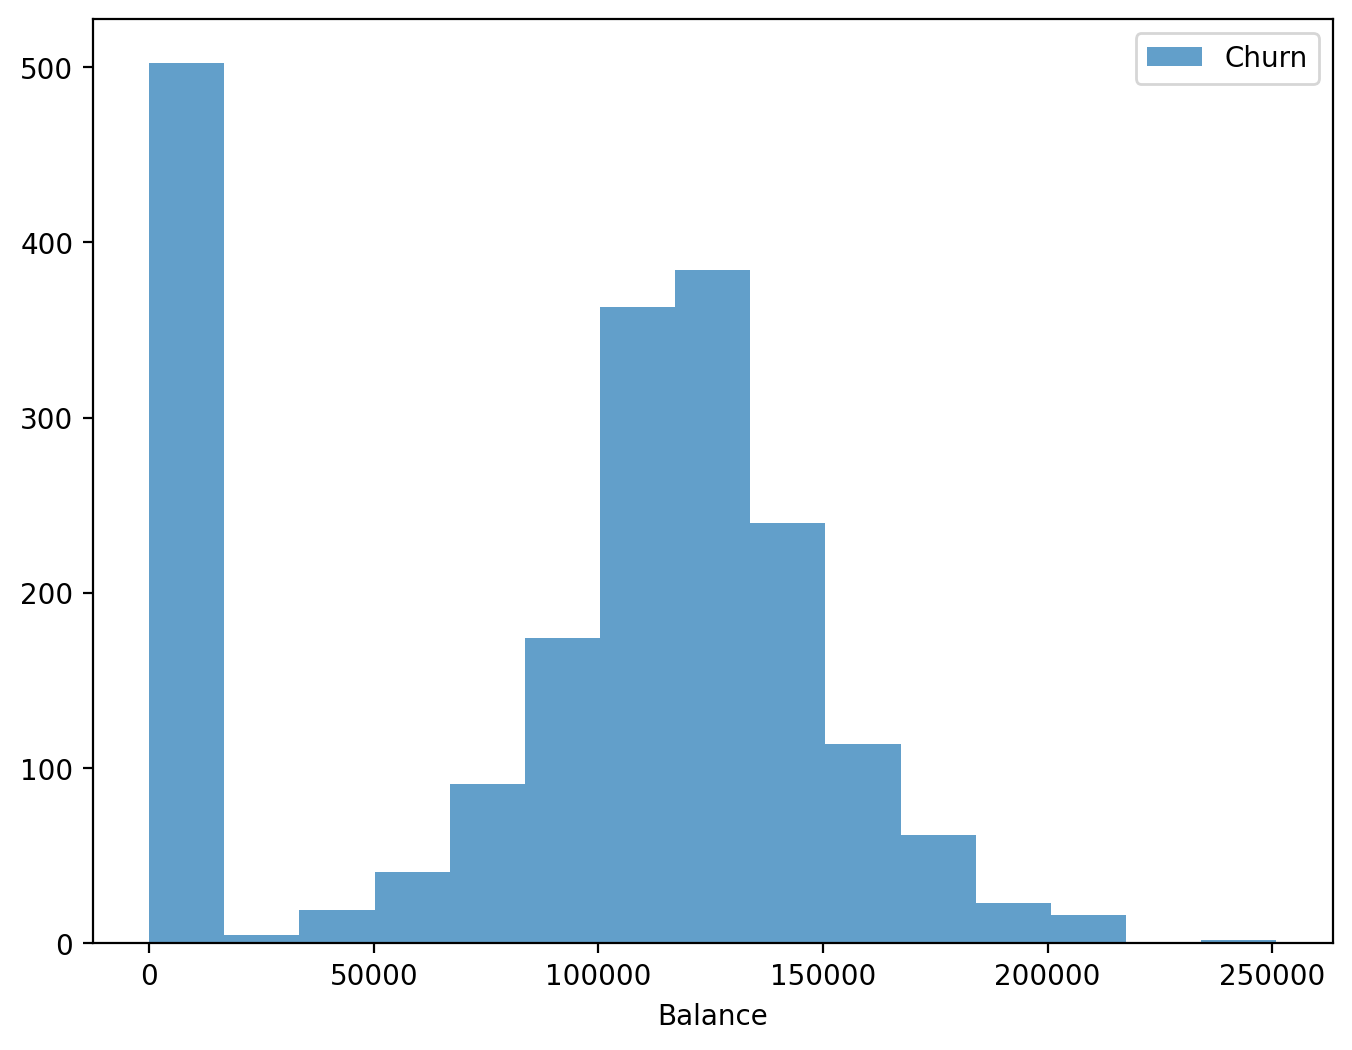

In [96]:
# distribution of the Balance for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(churn["Balance"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

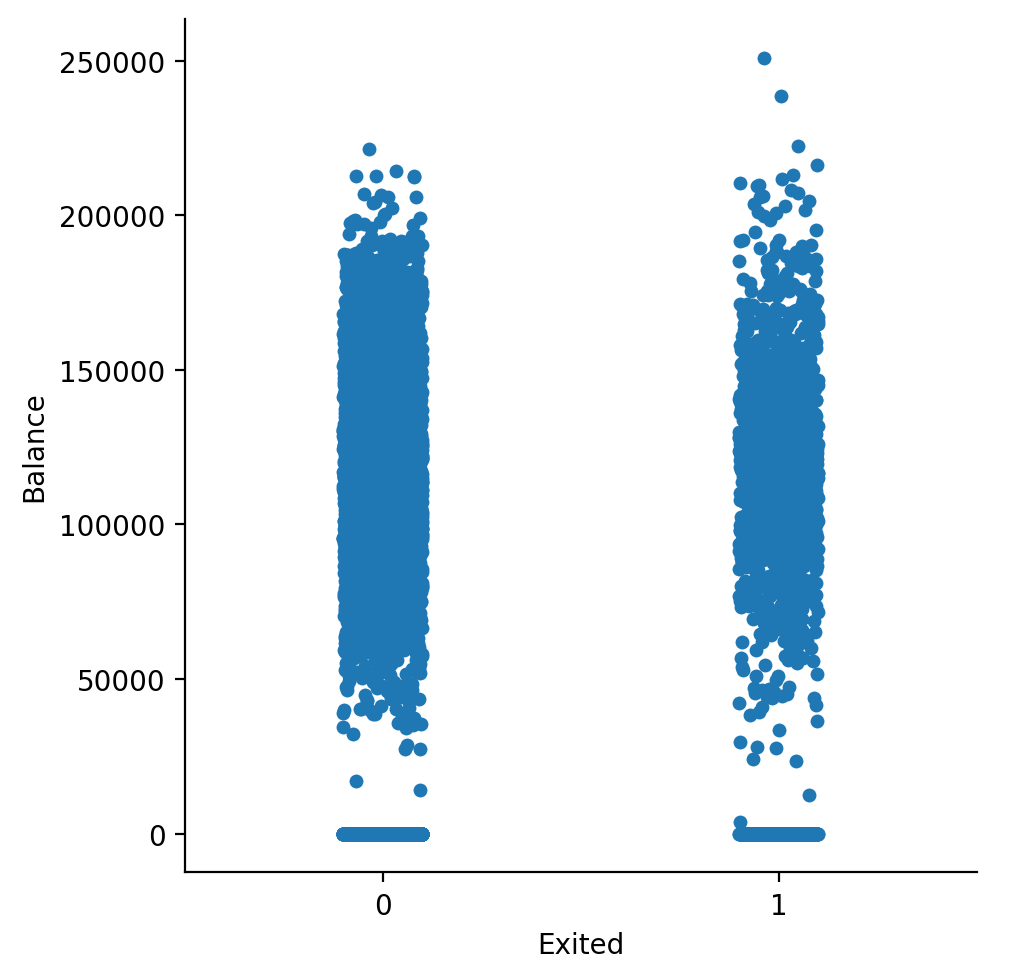

In [97]:
sns.catplot(x ="Exited", y ="Balance", data = df)

**EstimatedSalary**

In [98]:
# examining the EstimatedSalary of the not_churn group
not_churn["EstimatedSalary"].describe()

,EstimatedSalary
count,7963.000000
mean,99738.391772
std,57405.586966
min,90.070000
25%,50783.490000
50%,99645.040000
75%,148609.955000
max,199992.480000


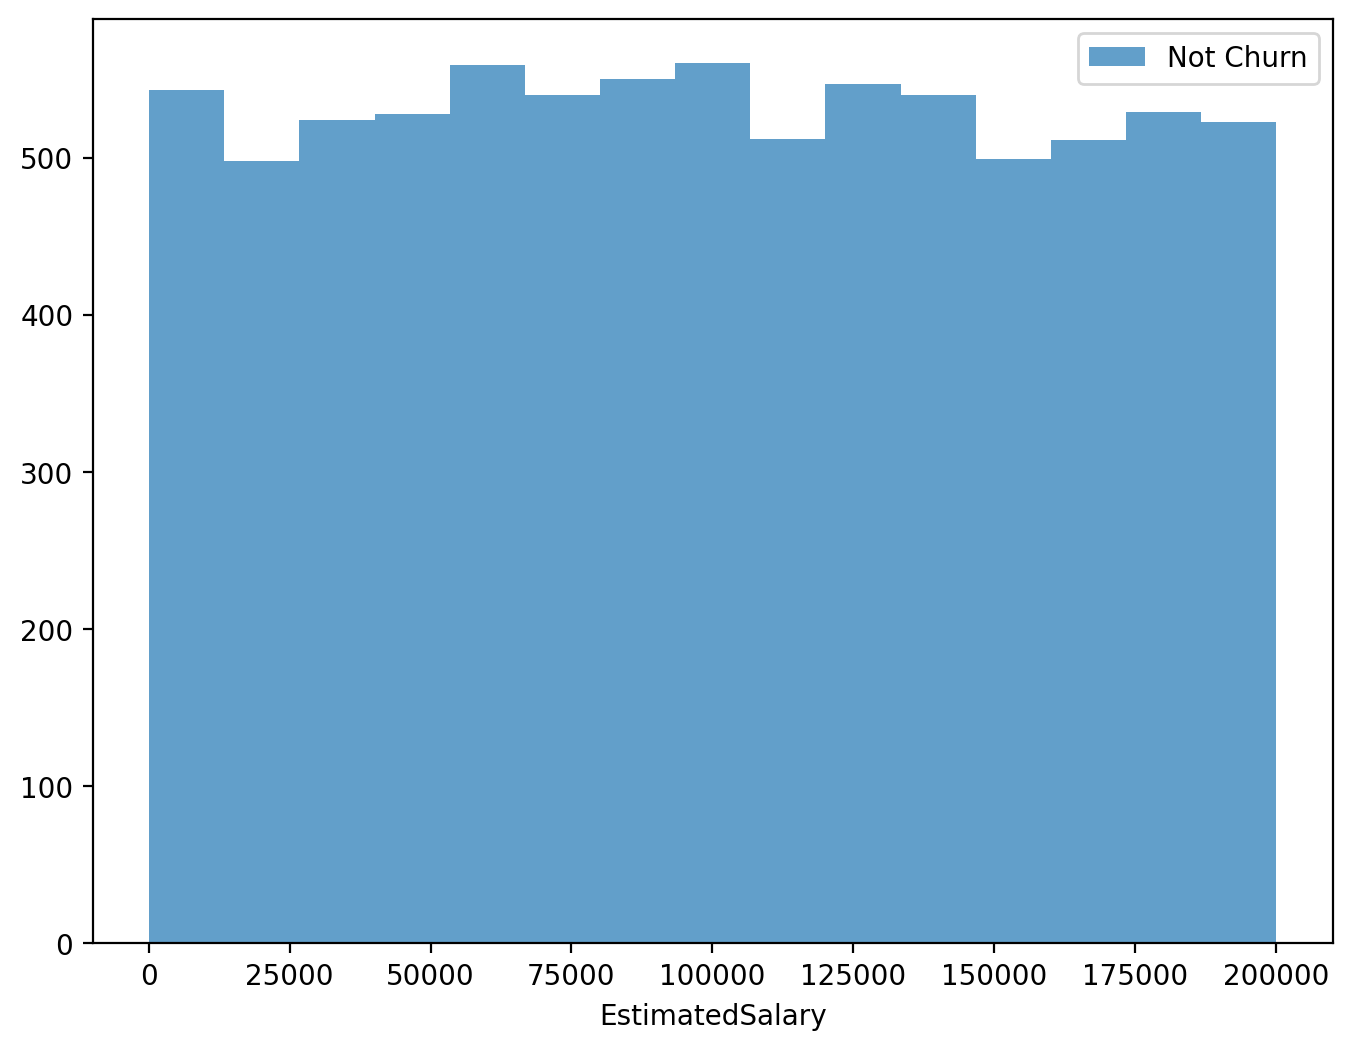

In [99]:
# distribution of the Balance for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [100]:
# examining the EstimatedSalary of the churn group
churn["EstimatedSalary"].describe()

,EstimatedSalary
count,2037.000000
mean,101465.677531
std,57912.418071
min,11.580000
25%,51907.720000
50%,102460.840000
75%,152422.910000
max,199808.100000


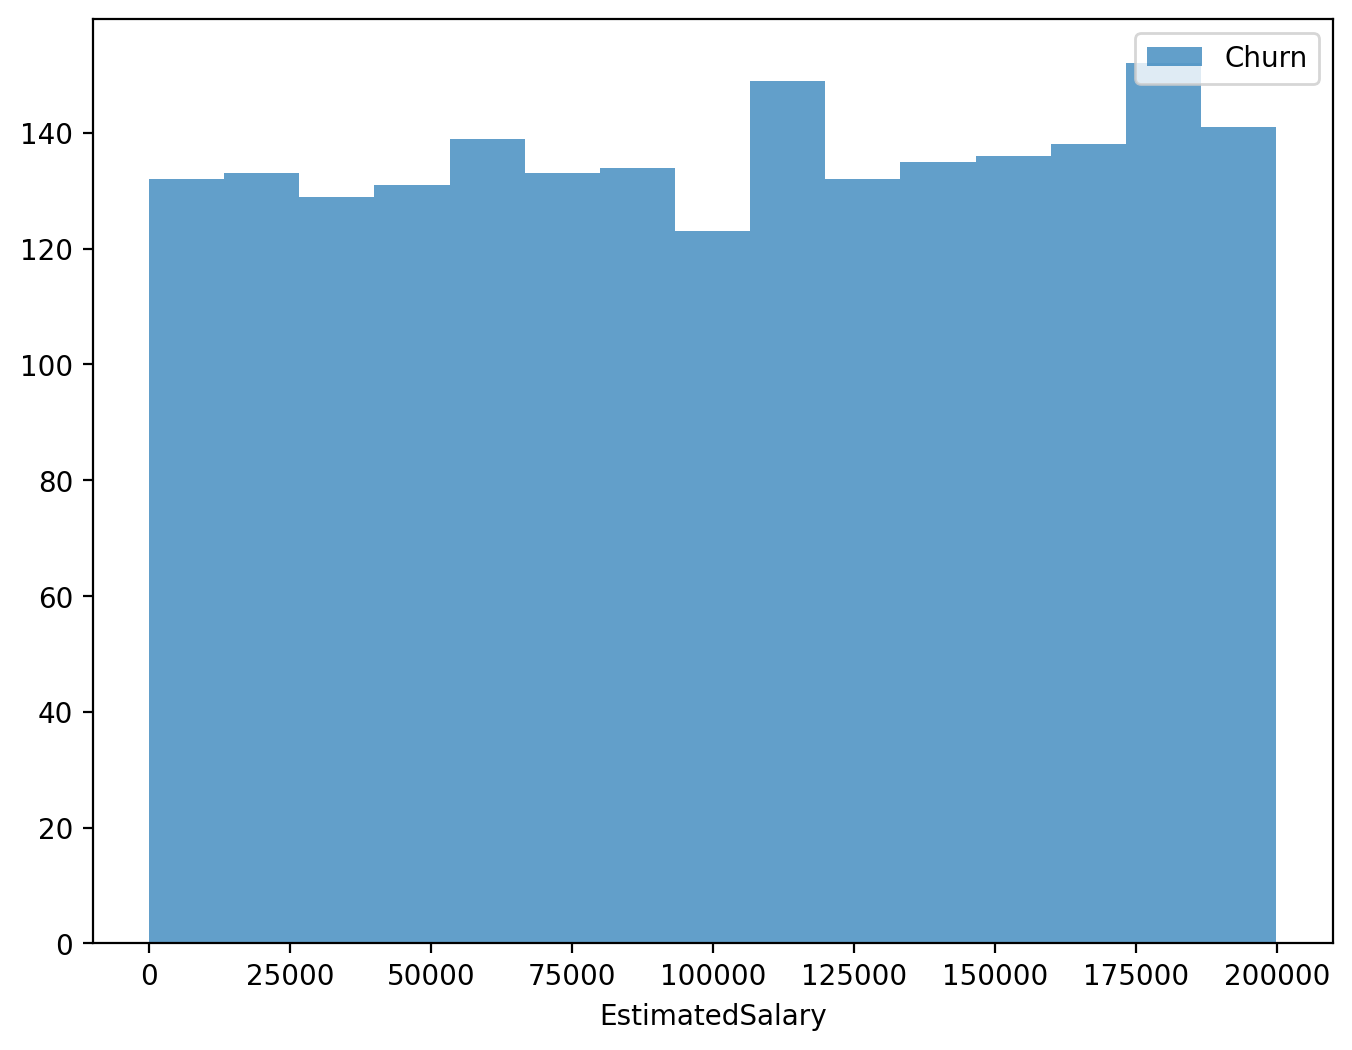

In [101]:
# distribution of the EstimatedSalary for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(churn["EstimatedSalary"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

### Correlation Matrix

In [102]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

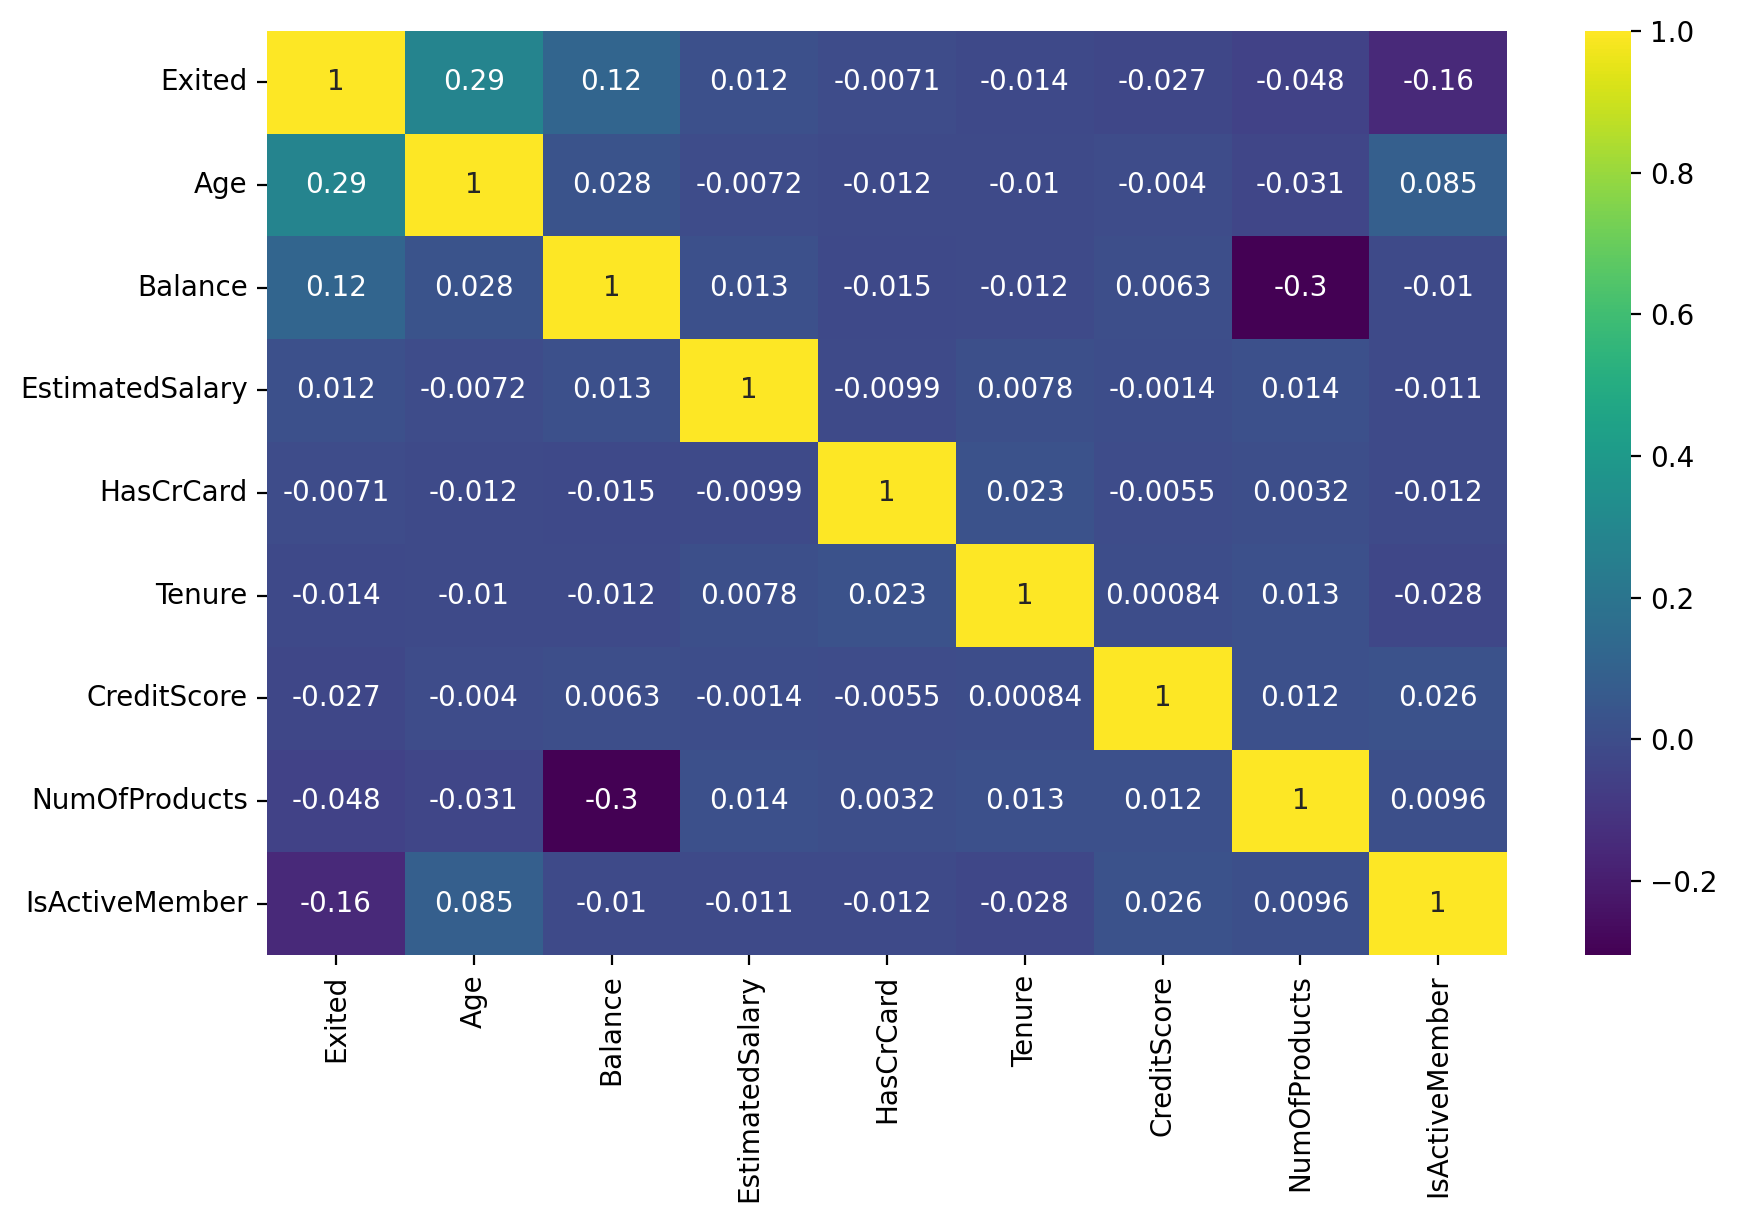

In [103]:
# Exited correlation matrix
# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(['CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)

k = 10 #number of variables for heatmap
cols = df_numeric.corr().nlargest(k, 'Exited')['Exited'].index
#cols = df.corr().nlargest(k, 'Exited')['Exited'].index is selecting the top k columns that have the highest
#absolute correlation with the 'Exited' column.

cm = df_numeric[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

> * Age and Exited: There is a positive correlation between Age and Exited, suggesting that older customers are more likely to churn.

> * Balance and Exited: Balance also shows a positive correlation with Exited, indicating that customers with higher balances tend to churn more often.

> * NumOfProducts and Exited: NumOfProducts has a negative correlation with Exited, which means customers with more products are less likely to churn.

> * IsActiveMember and Exited: There is a negative correlation between IsActiveMember and Exited, suggesting that active members are less likely to leave the bank.

> * CreditScore and Exited: CreditScore shows a slight negative correlation with Exited, implying that customers with higher credit scores are slightly less likely to churn.






### 2. Data Preprocessing

#### Missing Value


In [104]:
df.isna().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [105]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [106]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [107]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


### Feature Engineering
> pd.qcut = Quantile-based discretization function.

>It splits a continuous variable (numbers) into equal-sized groups based on percentiles (quantiles).

>Each bin has (almost) the same number of data points, not the same range.


```
.rank(method="first")

This assigns ranks to each row based on the Balance value.

method="first" means:

If two values are equal, the one that appears first in the dataset gets the smaller rank.

```

In [108]:
# we standardize tenure with age
df["NewTenure"] = df["Tenure"]/df["Age"]
df["NewCreditsScore"] = pd.qcut(df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["NewBalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])

df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [109]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
RowNumber,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4


### One Hot Encoding

In [110]:
list = ['Gender' , 'Geography']
df = pd.get_dummies(df , columns = list , drop_first = True)

In [111]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,False,False,False
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,False,False,True
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,False,False,False
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,False,False,False
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,False,False,True


### Scaling

In [112]:
# Removing variables that will not affect the dependent variable
df = df.drop(["CustomerId","Surname"], axis = 1)

In [113]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


In [114]:
new_cols_ohe = ["Gender_Male","Geography_Germany","Geography_Spain"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [115]:
cols_need_scale

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NewTenure']

In [116]:
# In your training notebook
import json
scaling_stats = {}
cols_need_scale = ['Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in cols_need_scale:
    scaling_stats[col] = {
        'median': float(df[col].median()),
        'q1': float(df[col].quantile(0.25)),
        'q3': float(df[col].quantile(0.75)),
        'q05': float(df[col].quantile(0.05)),
        'q95': float(df[col].quantile(0.95)),
        'q01': float(df[col].quantile(0.01)),
        'q99': float(df[col].quantile(0.99))
    }

# Save scaling statistics
with open('scaling_stats.json', 'w') as f:
    json.dump(scaling_stats, f)

In [117]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,
1,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,-0.217,3,6,1,6,False,False,False
2,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,-0.279,2,6,3,6,False,False,True
3,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0.164,1,6,5,6,False,False,False
4,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,-0.276,5,5,1,5,False,False,False
5,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,-0.220,6,6,4,4,False,False,True


### Modelling

In [118]:
from sklearn.metrics import accuracy_score , f1_score

X = df.drop('Exited', axis = 1) # axis=1  column
y = df['Exited']
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Models for Classification
models = [('LR', LogisticRegression(random_state=42)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=42)),
          ('RF', RandomForestClassifier(random_state=42)),
          ('SVR', SVC(gamma='auto',random_state=42)),
          ('GB', GradientBoostingClassifier(random_state = 42)),
          ("LightGBM", LGBMClassifier(random_state=42))]
results = []
accuracy = []
names = []

for name , model in models:
  kfold = KFold(n_splits=10 , random_state=42 , shuffle=True)
  cv_results = cross_val_score(model, X, y, cv=kfold)
  results.append(cv_results)
  accuracy.append(cv_results.mean())
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


LR: 0.823900 (0.011247)
KNN: 0.822500 (0.014739)
CART: 0.790100 (0.016428)
RF: 0.861100 (0.010387)
SVR: 0.845200 (0.008669)
GB: 0.864700 (0.011472)
[LightGBM] [Info] Number of positive: 1846, number of negative: 7154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205111 -> initscore=-1.354651
[LightGBM] [Info] Start training from score -1.354651
[LightGBM] [Info] Number of positive: 1835, number of negative: 7165
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

### Gradient Boosting Classifier


In [119]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[1541,  201],
       [  66,  192]])

In [120]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  192
True Negative :  1541
False Positive:  201
False Negative:  66


>* True Positive (TP): 192 ,
  These are the cases where the model correctly predicted that a customer would churn, and the customer actually did churn.

>* True Negative (TN): 1541 ,
  These are the cases where the model correctly predicted that a customer would not churn, and the customer actually did not churn.

>* False Positive (FP): 201 ,
  These are the cases where the model incorrectly predicted that a customer would churn, but the customer actually did not churn. This is also known as a Type I error.

>* False Negative (FN): 66 ,
  These are the cases where the model incorrectly predicted that a customer would not churn, but the customer actually did churn. This is also known as a Type II error.

In [121]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1742
           1       0.49      0.74      0.59       258

    accuracy                           0.87      2000
   macro avg       0.72      0.81      0.76      2000
weighted avg       0.90      0.87      0.88      2000



### Model Tuning

In [122]:
# LightGBM:
from sklearn.model_selection import GridSearchCV
lgbm_model = LGBMClassifier()
param_grid = {
    'num_leaves': [31, 63],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200 , 300 , 400 , 500]
}

grid = GridSearchCV(lgbm_model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [123]:
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

[LightGBM] [Info] Number of positive: 2037, number of negative: 7963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1137
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203700 -> initscore=-1.363328
[LightGBM] [Info] Start training from score -1.363328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [124]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)



In [125]:
# evaluate each model in turn
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42 , shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LightGBM] [Info] Number of positive: 1833, number of negative: 7167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203667 -> initscore=-1.363533
[LightGBM] [Info] Start training from score -1.363533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

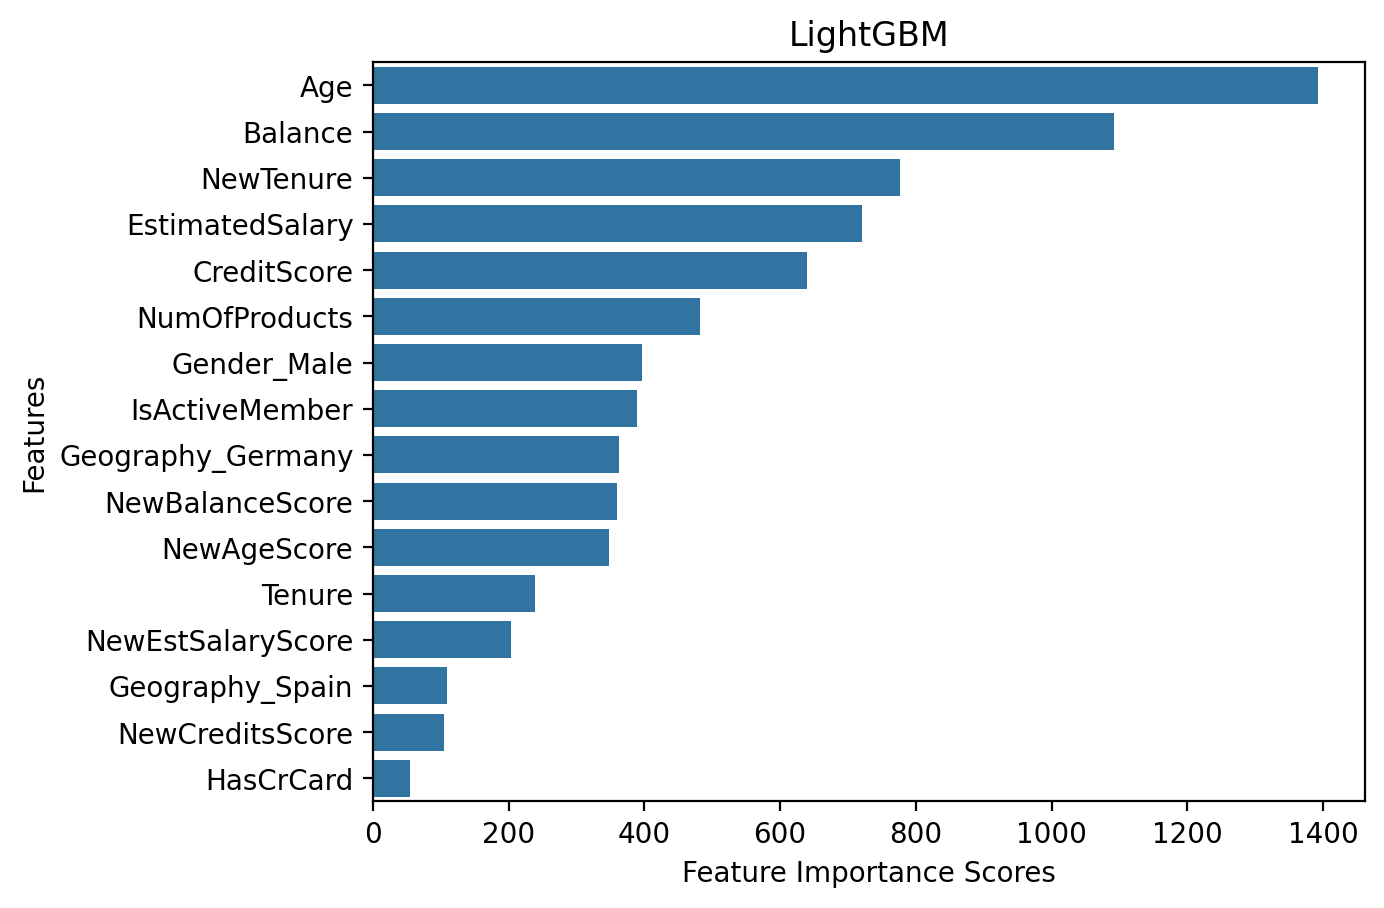

GB Accuracy Score: 0.8665


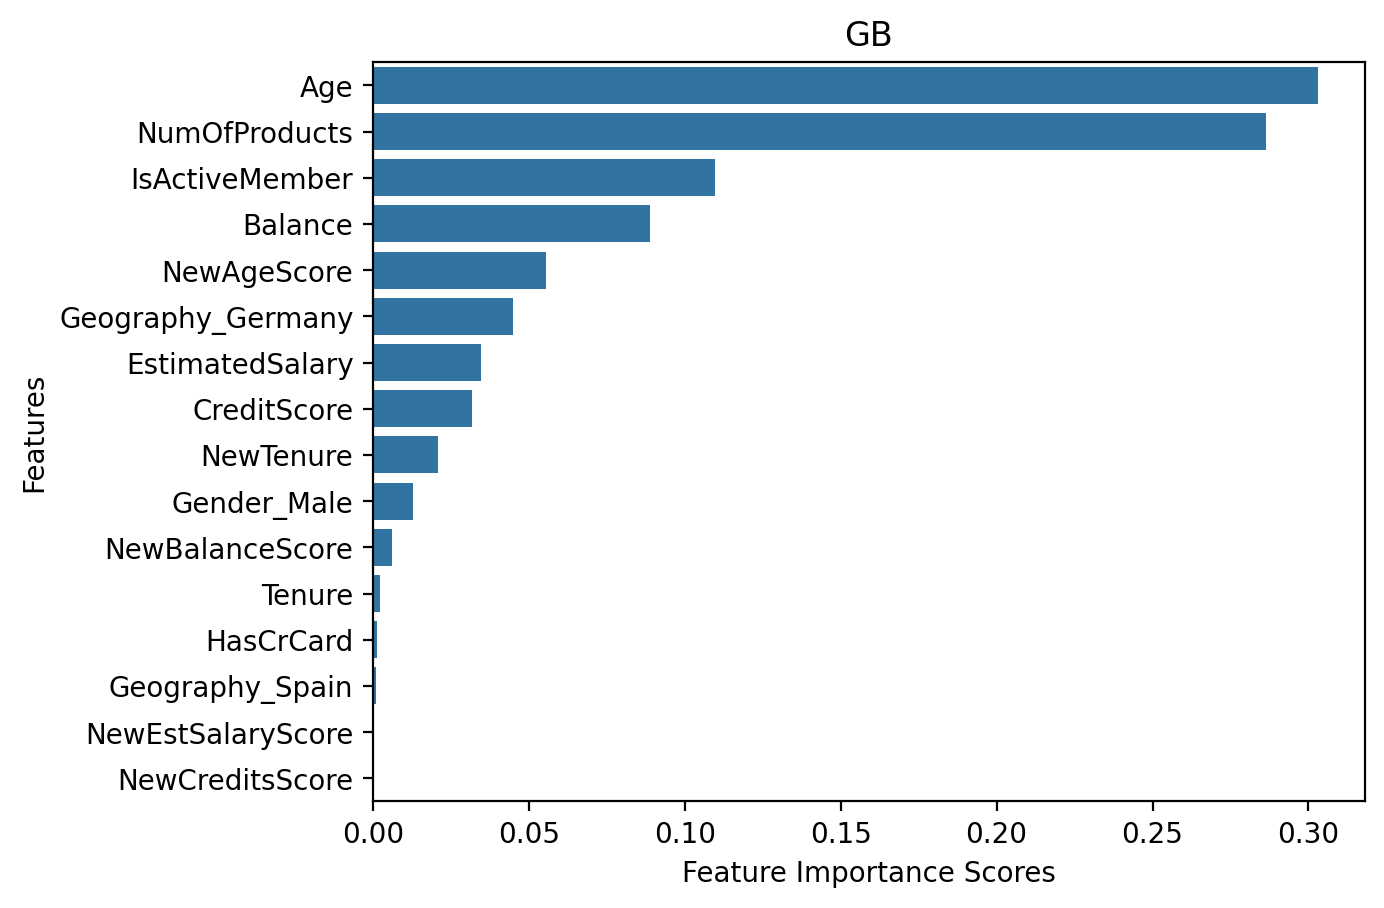

In [126]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        print(name + " Accuracy Score: " + str(acc_score))
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Scores')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

In [127]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'NewTenure', 'NewCreditsScore',
       'NewAgeScore', 'NewBalanceScore', 'NewEstSalaryScore', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

### Exporting a good model for api access

In [128]:
req_columns = ['Age','Balance','Tenure','NumOfProducts','EstimatedSalary','CreditScore','Gender_Male']
X = df[req_columns]
y = df['Exited']

In [129]:
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

[LightGBM] [Info] Number of positive: 2037, number of negative: 7963
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203700 -> initscore=-1.363328
[LightGBM] [Info] Start training from score -1.363328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [130]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)



In [131]:
# evaluate each model in turn
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42 , shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LightGBM] [Info] Number of positive: 1833, number of negative: 7167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 847
[LightGBM] [Info] Number of data points in the train set: 9000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203667 -> initscore=-1.363533
[LightGBM] [Info] Start training from score -1.363533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [132]:
X.columns

Index(['Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary',
       'CreditScore', 'Gender_Male'],
      dtype='object')

Feature Importances for LightGBM (tuned):
Age                1648
CreditScore        1451
Balance            1407
EstimatedSalary    1229
Tenure              667
NumOfProducts       584
Gender_Male         491
dtype: int32


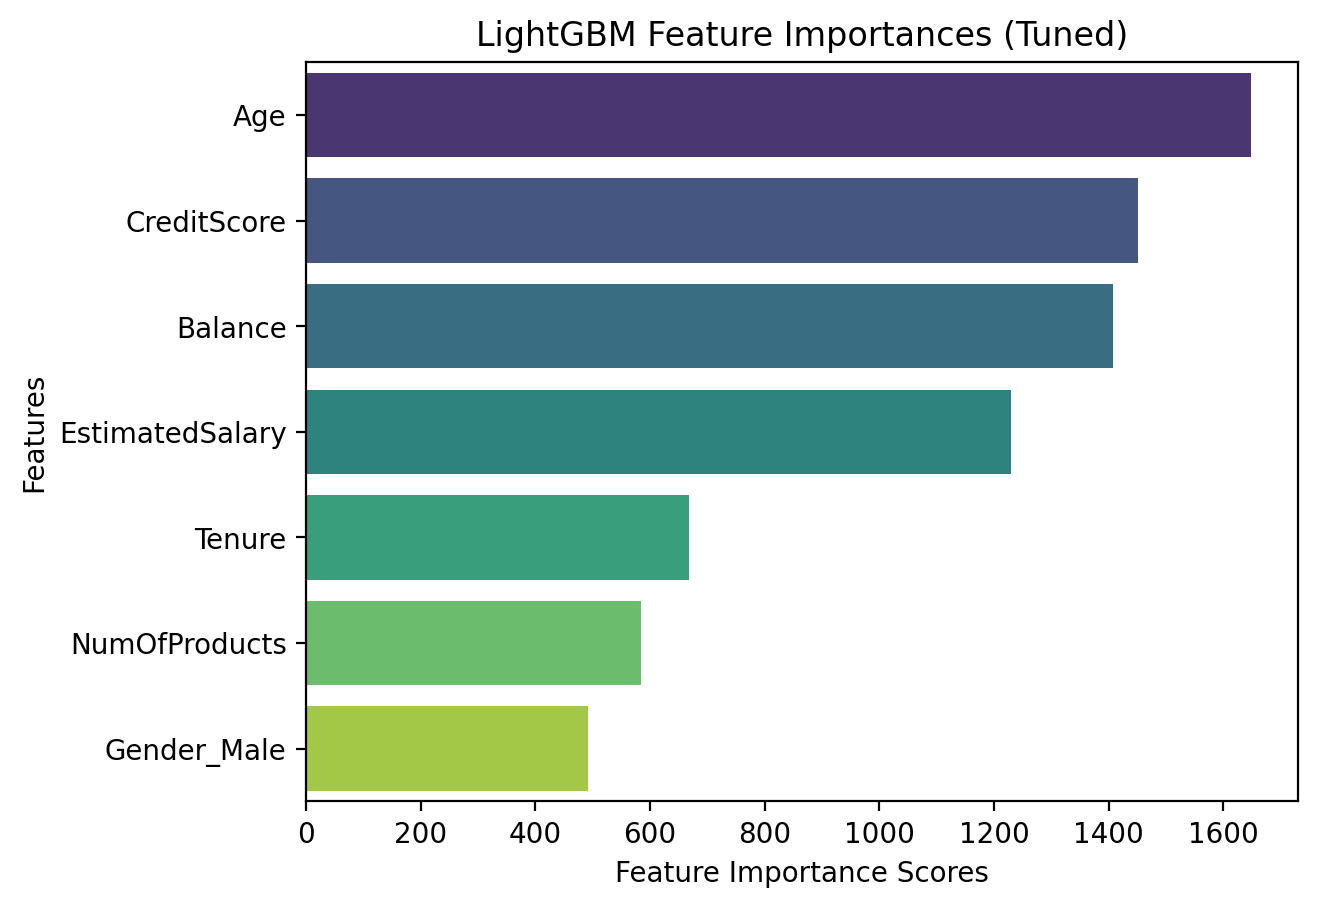

In [138]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances for LightGBM (tuned):")
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis') # Added palette='viridis'
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('LightGBM Feature Importances (Tuned)') # Added title
plt.show() # Added show to display the plot

In [ ]:
import pickle
pickle_model_path = 'model.pkl'
with open(pickle_model_path, 'wb') as file:
    pickle.dump(lgbm_tuned, file)

In [ ]:
X.head()